# 1c4.5

In [196]:
import numpy as np 
import pandas as pd


In [197]:
data=pd.read_excel("zy.xlsx",sheet_name='c4.5')

In [198]:
data=data.iloc[:,0:5]
data

,年龄,收入,学生,信誉,归类：买计算机？
0,23,低,是,良,买
1,25,高,否,优,不买
2,32,高,否,良,不买
3,36,中,否,良,不买
4,38,中,是,优,买
5,41,高,是,良,买
6,42,低,是,优,买
7,43,中,否,优,买
8,46,高,否,良,买
9,51,中,是,良,买


In [199]:
list_replace=[{'收入':{"低":0,'中':1,'高':2}},
              {'学生':{"是":1,'否':0}},
              {'信誉':{"良":1,'优':0}},
             
             ]
for i in list_replace:
    data.replace(i,inplace=True)    
data
#  {'归类：买计算机？':{"买":1,'不买':0}}

,年龄,收入,学生,信誉,归类：买计算机？
0,23,0,1,1,买
1,25,2,0,0,不买
2,32,2,0,1,不买
3,36,1,0,1,不买
4,38,1,1,0,买
5,41,2,1,1,买
6,42,0,1,0,买
7,43,1,0,0,买
8,46,2,0,1,买
9,51,1,1,1,买


In [200]:
train_data=data[0:14]
test_data=data.iloc[14:]

In [201]:
train_col=['年龄','收入','学生','信誉']

In [202]:
from  sklearn.tree  import DecisionTreeRegressor
from  sklearn.tree  import DecisionTreeClassifier
from sklearn import model_selection
from sklearn import tree

In [203]:
Dtr_model=DecisionTreeClassifier(max_depth=3,criterion= "entropy" )

In [204]:
Dtr_result=Dtr_model.fit(train_data[train_col],train_data.iloc[:,-1:])

In [205]:
from sklearn.externals.six import StringIO
dot_data = StringIO() #解决中文乱码
#图形化树结构
dot_tree = tree.export_graphviz(Dtr_result,out_file=dot_data, #树的内容存入dot_data对象
                                feature_names=train_col,#X特征的列名
                                class_names=['不买','买',],#去重后Y的取值，注意顺序别标反
                                filled=True, #是否有填充色
                                rounded=True #是否为圆角边
                                )

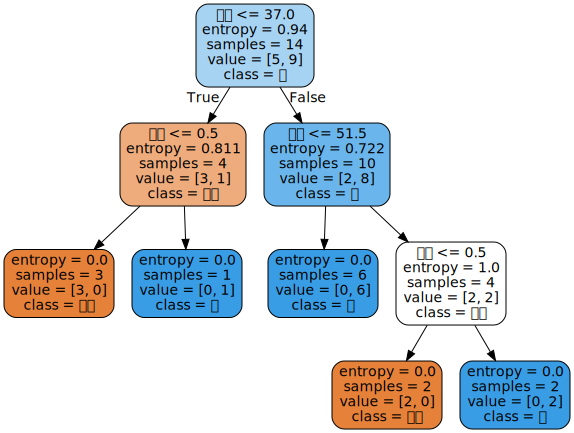

In [206]:
import graphviz
graph = graphviz.Source(dot_data.getvalue().replace("helvetica",'"Microsoft YaHei"')) #把dot_data 内容转化为图形
#replace("helvetica",'"Microsoft YaHei"') 是为解决中文乱码
#图形导出 
graph.render("ttt",format='png')
graph

In [207]:
data

,年龄,收入,学生,信誉,归类：买计算机？
0,23,0,1,1,买
1,25,2,0,0,不买
2,32,2,0,1,不买
3,36,1,0,1,不买
4,38,1,1,0,买
5,41,2,1,1,买
6,42,0,1,0,买
7,43,1,0,0,买
8,46,2,0,1,买
9,51,1,1,1,买


### 预测

In [208]:

print(Dtr_result.predict(test_data[train_col]))
test_data

['买']


,年龄,收入,学生,信誉,归类：买计算机？
14,53,1,0,1,？？？


# 2  cart分类

In [209]:
data2=pd.read_excel("zy.xlsx",sheet_name='cart分类')

In [210]:
data_2=data2.iloc[:,:4]
data_2

,有房,婚姻状况,年收入,拖欠贷款
0,是,单身,125K,否
1,否,已婚,100K,否
2,否,单身,70K,否
3,是,已婚,120K,否
4,否,离异,95K,是
5,否,已婚,60K,否
6,是,离异,220K,否
7,否,单身,85K,是
8,否,已婚,75K,否
9,否,单身,90K,是


In [211]:
list_replace2=[{'有房':{"是":1,'否':0}},
              {'婚姻状况':{"已婚":1,'单身':0,'离异':2}},

             
             ]
for i in list_replace2:
    data_2.replace(i,inplace=True)    
data_2
#  {'归类：买计算机？':{"买":1,'不买':0}}

,有房,婚姻状况,年收入,拖欠贷款
0,1,0,125K,否
1,0,1,100K,否
2,0,0,70K,否
3,1,1,120K,否
4,0,2,95K,是
5,0,1,60K,否
6,1,2,220K,否
7,0,0,85K,是
8,0,1,75K,否
9,0,0,90K,是


In [212]:
data_2.年收入=data_2.年收入.apply(lambda x:x.replace('K',""))
data_2

,有房,婚姻状况,年收入,拖欠贷款
0,1,0,125,否
1,0,1,100,否
2,0,0,70,否
3,1,1,120,否
4,0,2,95,是
5,0,1,60,否
6,1,2,220,否
7,0,0,85,是
8,0,1,75,否
9,0,0,90,是


In [213]:
data_2.年收入=data_2.年收入.astype(int)

In [214]:
train_data2=data_2[0:10]


In [215]:
test_data2=data_2[10:]
test_data2

,有房,婚姻状况,年收入,拖欠贷款
10,1,0,100,??


In [216]:
from  sklearn.tree  import DecisionTreeRegressor
from  sklearn.tree  import DecisionTreeClassifier
from sklearn import model_selection
from sklearn import tree

In [217]:
dstF_model=DecisionTreeClassifier(criterion='gini',max_depth=2)

In [218]:
dstF_res=dstF_model.fit(train_data2[['有房','婚姻状况','年收入']],train_data2['拖欠贷款'])

In [219]:
from sklearn.externals.six import StringIO
import graphviz
def creat_png(model,train_col,class_names):
    dot_data = StringIO() #解决中文乱码
    #图形化树结构
    dot_tree = tree.export_graphviz(model,out_file=dot_data, #树的内容存入dot_data对象
                                    feature_names=train_col,#X特征的列名
                                    class_names=class_names,#去重后Y的取值，注意顺序别标反
                                    filled=True, #是否有填充色
                                    rounded=True #是否为圆角边
                                    )
    graph = graphviz.Source(dot_data.getvalue().replace("helvetica",'"Microsoft YaHei"')) #把dot_data 内容转化为图形
    return graph 





In [220]:
train_col=['有房','婚姻状况','年收入']
class_names=['否','是',]
file_name='2 cart分类'



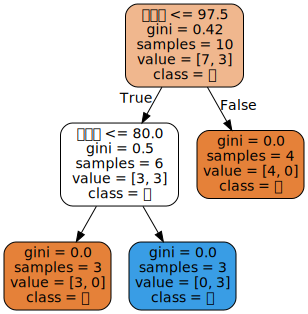

In [221]:
graph =creat_png(dstF_res,train_col,class_names)
graph.render(file_name,format='png')
graph

In [222]:
print(dstF_res.predict(test_data2[train_col])[0])
test_data2[train_col]

否


,有房,婚姻状况,年收入
10,1,0,100


## 3.cart回归

In [250]:
data_3=pd.read_excel("zy.xlsx",sheet_name='cart回归')

In [251]:
data3=data_3.iloc[:,:5]
data3

,x1,x2,y,x3,x4
0,young,myope,476,reduced,no lenses
1,young,myope,334,normal,soft
2,young,myope,358,reduced,no lenses
3,young,myope,431,normal,hard
4,young,hyper,405,reduced,no lenses
5,young,hyper,405,normal,soft
6,young,hyper,442,reduced,no lenses
7,young,hyper,431,normal,hard
8,pre,myope,446,reduced,no lenses
9,pre,myope,385,normal,soft


In [252]:
data3.x2.unique()

array(['myope', 'hyper'], dtype=object)

In [253]:
# from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder()

In [254]:
# 'young', 'pre', 'presbyopic'
# list_replace2=[{'x1':{'young':1,'pre':0,'presbyopic':3}},
#               {'婚姻状况':{"已婚":1,'单身':0,'离异':2}},

             
#              ]
train_col3=[i for i in data3.columns if i !='y' ]
train_col3

['x1', 'x2', 'x3', 'x4']

In [255]:
train_data=pd.get_dummies(data3[train_col3])

In [256]:
train_data=pd.concat([train_data,data3.y],axis=1)

In [257]:
train_col3=train_data.columns
train_col3=list(train_col3)

In [258]:
trin_data3=train_data[:23]
test_data3=train_data[23:]


In [259]:
from  sklearn.tree  import DecisionTreeRegressor
from sklearn import model_selection
from sklearn import tree

In [260]:
deR_model=DecisionTreeRegressor( max_depth=2)

In [263]:
der_result=deR_model.fit(trin_data3[train_col3],trin_data3.y)


In [264]:
der_result.predict(test_data3[train_col3]) #预测结果

array([473.16666667])

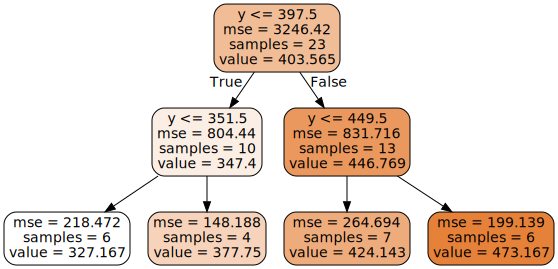

In [265]:
file_name='cart回归'
graph =creat_png(der_result,train_col3,class_names='0')#def creat_png(model,train_col,class_names):
graph.render(file_name,format='png')
graph